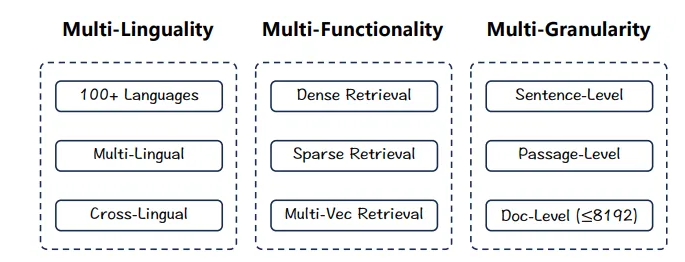

# 한문장 테스트

In [46]:
simple_sentence1 = "I like an apple"

In [48]:
from FlagEmbedding import FlagModel
model = FlagModel('D:/LLMs/bge-m3', use_fp16=False)
embeddings = model.encode(simple_sentence1)
embeddings

You're using a XLMRobertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


array([-0.00694152,  0.02293514, -0.04296022, ...,  0.00797774,
       -0.03127418,  0.0122012 ], shape=(1024,), dtype=float32)

In [50]:
model = FlagModel('D:/LLMs/bge-m3', use_fp16=True)
embeddings = model.encode(simple_sentence1)
embeddings

You're using a XLMRobertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


array([-0.00694152,  0.02293514, -0.04296022, ...,  0.00797774,
       -0.03127418,  0.0122012 ], shape=(1024,), dtype=float32)

In [51]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer("D:/LLMs/bge-m3")
embeddings = model.encode(simple_sentence1, normalize_embeddings=True)
embeddings

array([-0.00694152,  0.02293514, -0.04296022, ...,  0.00797774,
       -0.03127418,  0.0122012 ], shape=(1024,), dtype=float32)

In [52]:
embeddings = model.encode(simple_sentence1, normalize_embeddings=False)
embeddings

array([-0.00694152,  0.02293514, -0.04296022, ...,  0.00797774,
       -0.03127418,  0.0122012 ], shape=(1024,), dtype=float32)

In [53]:
from FlagEmbedding import BGEM3FlagModel
model = BGEM3FlagModel('D:/LLMs/bge-m3', use_fp16=True)
output_1 = model.encode(simple_sentence1)
output_1

You're using a XLMRobertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


{'dense_vecs': array([-0.00694152,  0.02293514, -0.04296022, ...,  0.00797774,
        -0.03127418,  0.0122012 ], shape=(1024,), dtype=float32),
 'lexical_weights': None,
 'colbert_vecs': None}

In [74]:
from FlagEmbedding import BGEM3FlagModel
model = BGEM3FlagModel('D:/LLMs/bge-m3', use_fp16=False)
output_1 = model.encode(simple_sentence1)
output_1


You're using a XLMRobertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


{'dense_vecs': array([-0.00694152,  0.02293514, -0.04296022, ...,  0.00797774,
        -0.03127418,  0.0122012 ], shape=(1024,), dtype=float32),
 'lexical_weights': None,
 'colbert_vecs': None}

In [55]:
output_1 = model.encode(
    simple_sentence1, 
    return_dense=True, 
    return_sparse=True, 
    return_colbert_vecs=True
    )
output_1

{'dense_vecs': array([-0.00694152,  0.02293514, -0.04296022, ...,  0.00797774,
        -0.03127418,  0.0122012 ], shape=(1024,), dtype=float32),
 'lexical_weights': defaultdict(int,
             {'87': np.float32(0.24954829),
              '1884': np.float32(0.32686594),
              '142': np.float32(0.2139212),
              '108787': np.float32(0.3305862)}),
 'colbert_vecs': array([[-0.01384545, -0.00695757,  0.02088078, ...,  0.02422973,
          0.02642599, -0.00463645],
        [ 0.00587985,  0.00501453,  0.00079096, ...,  0.02935684,
          0.03125848, -0.00989153],
        [-0.01588865,  0.00896384,  0.02074633, ...,  0.01699764,
          0.02509221, -0.01387322],
        [-0.01620189,  0.02160279,  0.05190439, ...,  0.04600023,
          0.01582402,  0.00220745],
        [ 0.01588189, -0.00040529, -0.02363497, ...,  0.03066045,
          0.03024283, -0.012795  ]], shape=(5, 1024), dtype=float32)}

In [7]:
output_1['dense_vecs'], len(output_1['dense_vecs'])

(array([-0.00694152,  0.02293514, -0.04296022, ...,  0.00797774,
        -0.03127418,  0.0122012 ], shape=(1024,), dtype=float32),
 1024)

In [8]:
model.convert_id_to_token(output_1['lexical_weights'])

{'I': np.float32(0.24954829),
 'like': np.float32(0.32686594),
 'an': np.float32(0.2139212),
 'apple': np.float32(0.3305862)}

In [9]:
output_1['lexical_weights']

defaultdict(int,
            {'87': np.float32(0.24954829),
             '1884': np.float32(0.32686594),
             '142': np.float32(0.2139212),
             '108787': np.float32(0.3305862)})

In [16]:
output_1['colbert_vecs'], output_1['colbert_vecs'].shape

(array([[-0.01384545, -0.00695757,  0.02088078, ...,  0.02422973,
          0.02642599, -0.00463645],
        [ 0.00587985,  0.00501453,  0.00079096, ...,  0.02935684,
          0.03125848, -0.00989153],
        [-0.01588865,  0.00896384,  0.02074633, ...,  0.01699764,
          0.02509221, -0.01387322],
        [-0.01620189,  0.02160279,  0.05190439, ...,  0.04600023,
          0.01582402,  0.00220745],
        [ 0.01588189, -0.00040529, -0.02363497, ...,  0.03066045,
          0.03024283, -0.012795  ]], shape=(5, 1024), dtype=float32),
 (5, 1024))

# 문장간 테스트

In [56]:
sentences_1 = [
    "What is BGE M3?",
    "Definition of BM25",
]

sentences_2 = [
    "BGE M3 is an embedding model supporting dense retrieval, lexical matching, and multi-vector interaction.",
    "BM25 is a bag-of-words retrieval function that ranks a set of documents based on the query terms appearing in each document.",
]

In [57]:
output_1 = model.encode(
                          sentences_1, 
                          return_dense=True, 
                          return_sparse=True, 
                          return_colbert_vecs=True
                        )

output_2 = model.encode(
                          sentences_2, 
                          return_dense=True, 
                          return_sparse=True, 
                          return_colbert_vecs=True
                        )


print(output_1['dense_vecs'] @ output_2['dense_vecs'].T)
print("-"*30)

print(model.compute_lexical_matching_score(output_1['lexical_weights'], output_2['lexical_weights']))
print("-"*30)

print(model.colbert_score(output_1['colbert_vecs'][0], output_2['colbert_vecs'][0]))
print(model.colbert_score(output_1['colbert_vecs'][0], output_2['colbert_vecs'][1]))
print(model.colbert_score(output_1['colbert_vecs'][1], output_2['colbert_vecs'][0]))
print(model.colbert_score(output_1['colbert_vecs'][1], output_2['colbert_vecs'][1]))

[[0.6236457  0.3343446 ]
 [0.33147958 0.6576555 ]]
------------------------------
[[0.19579473 0.01094605]
 [0.         0.18646839]]
------------------------------
tensor(0.7818)
tensor(0.4516)
tensor(0.4656)
tensor(0.8006)


In [62]:
sentence_pairs = [[i,j] for i in sentences_1 for j in sentences_2]
sentence_pairs

[['What is BGE M3?',
  'BGE M3 is an embedding model supporting dense retrieval, lexical matching, and multi-vector interaction.'],
 ['What is BGE M3?',
  'BM25 is a bag-of-words retrieval function that ranks a set of documents based on the query terms appearing in each document.'],
 ['Definition of BM25',
  'BGE M3 is an embedding model supporting dense retrieval, lexical matching, and multi-vector interaction.'],
 ['Definition of BM25',
  'BM25 is a bag-of-words retrieval function that ranks a set of documents based on the query terms appearing in each document.']]

In [83]:
from pprint import pprint
pprint(model.compute_score(sentence_pairs, 
                          max_passage_length=128, # a smaller max length leads to a lower latency
                          weights_for_different_modes=[0.0, 0.0, 0.0]   # dense, lexical, colbert 반영 비율율
                          ))

{'colbert': [0.7817546725273132,
             0.45164698362350464,
             0.46556559205055237,
             0.8005884885787964],
 'colbert+sparse+dense': [nan, nan, nan, nan],
 'dense': [0.6236456036567688,
           0.3343445658683777,
           0.33147957921028137,
           0.6576555371284485],
 'sparse': [0.1957947313785553, 0.010946046561002731, 0.0, 0.18646837770938873],
 'sparse+dense': [nan, nan, nan, nan]}


In [84]:
pprint(model.compute_score(sentence_pairs, 
                          max_passage_length=128, # a smaller max length leads to a lower latency
                          weights_for_different_modes=[0.3333, 0.3333, 0.3333]
                          ))

{'colbert': [0.7817546725273132,
             0.45164698362350464,
             0.46556559205055237,
             0.8005884885787964],
 'colbert+sparse+dense': [0.5337316989898682,
                          0.2656458914279938,
                          0.26568174362182617,
                          0.5482374429702759],
 'dense': [0.6236456036567688,
           0.3343445658683777,
           0.33147957921028137,
           0.6576555371284485],
 'sparse': [0.1957947313785553, 0.010946046561002731, 0.0, 0.18646837770938873],
 'sparse+dense': [0.40972015261650085,
                  0.17264531552791595,
                  0.16573978960514069,
                  0.422061949968338]}


In [85]:
pprint(model.compute_score(sentence_pairs, 
                          max_passage_length=128, # a smaller max length leads to a lower latency
                          weights_for_different_modes=[1.0, 0.0, 0.0]))

{'colbert': [0.7817546725273132,
             0.45164698362350464,
             0.46556559205055237,
             0.8005884885787964],
 'colbert+sparse+dense': [0.6236456036567688,
                          0.3343445658683777,
                          0.33147957921028137,
                          0.6576555371284485],
 'dense': [0.6236456036567688,
           0.3343445658683777,
           0.33147957921028137,
           0.6576555371284485],
 'sparse': [0.1957947313785553, 0.010946046561002731, 0.0, 0.18646837770938873],
 'sparse+dense': [0.6236456036567688,
                  0.3343445658683777,
                  0.33147957921028137,
                  0.6576555371284485]}


In [86]:
sentences_1_2 = [
    "What is BGE M3?",
    "Definition of BM25",
    "BGE M3 is an embedding model supporting dense retrieval, lexical matching, and multi-vector interaction.",
    "BM25 is a bag-of-words retrieval function that ranks a set of documents based on the query terms appearing in each document.",
]
from FlagEmbedding import FlagModel
model1 = FlagModel('D:/LLMs/bge-m3', use_fp16=False)
embeddings = model1.encode(sentences_1_2)
scores = embeddings @ embeddings.T
scores

You're using a XLMRobertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


array([[1.        , 0.4115846 , 0.6236457 , 0.3343446 ],
       [0.4115846 , 0.9999997 , 0.33147958, 0.6576556 ],
       [0.6236457 , 0.33147958, 0.9999998 , 0.5666445 ],
       [0.3343446 , 0.6576556 , 0.5666445 , 1.0000002 ]], dtype=float32)

ColBERT (Contextualized Late Interaction over BERT) 벡터의 주요 특징은 다음과 같습니다:

1. **Late Interaction 방식**  
   - ColBERT은 전통적인 BERT 기반 검색 모델과 달리, 질의(query)와 문서(document) 간의 유사도를 계산할 때 전체 문장을 하나의 벡터로 변환하지 않고, **토큰 단위로 벡터를 비교**하는 "Late Interaction" 방식을 사용합니다.  
   - 이를 통해 보다 정밀한 검색이 가능하며, 단순한 문장 수준의 유사도보다 더 세밀한 정보 검색이 가능합니다.

2. **토큰 단위 임베딩(Term-wise Representation)**  
   - 일반적인 문장 임베딩 모델과 다르게, ColBERT은 문장의 각 토큰을 개별적인 벡터로 변환합니다.  
   - 검색할 때도 전체 문장 벡터가 아니라, 문장 내 각 단어의 의미를 유지하면서 비교할 수 있도록 설계되어 있습니다.

3. **MaxSim 연산 사용**  
   - ColBERT은 질의와 문서의 토큰 벡터 간 유사도를 측정할 때, 모든 질의 토큰과 문서 토큰 간의 cosine similarity를 계산한 후, 각 질의 토큰에 대해 가장 유사한 문서 토큰의 점수를 선택하는 **MaxSim 연산**을 사용합니다.  
   - 이는 불필요한 정보를 걸러내고, 중요한 키워드가 강조되도록 돕습니다.

4. **효율적인 인덱싱과 검색**  
   - ColBERT은 토큰 단위로 임베딩을 저장하고 검색을 수행하기 때문에, 기존 dense retrieval 방식(BERT 기반 Dense Passage Retrieval)보다 **병렬 처리**가 가능하고, **속도와 정확도의 균형**을 맞출 수 있습니다.  
   - 이를 위해 FAISS(Facebook AI Similarity Search) 같은 라이브러리를 활용하여 효율적인 인덱싱을 수행합니다.

5. **Dense + Sparse Hybrid 가능**  
   - ColBERT은 dense representation(토큰 임베딩)을 활용하지만, BM25 같은 sparse retrieval 기법과 결합하여 **하이브리드 검색**을 구현할 수도 있습니다.  
   - 이로 인해 전통적인 키워드 기반 검색과 신경망 기반 검색의 장점을 모두 활용할 수 있습니다.

### ColBERT의 장점
- **더 정밀한 검색 결과**: 문장 전체를 하나의 벡터로 표현하는 방식보다 세밀한 검색이 가능.
- **빠른 검색 속도**: 토큰 단위 벡터 비교 방식으로 병렬 처리 가능.
- **유연한 검색**: 키워드 기반 검색(BM25)과 결합하여 하이브리드 검색 가능.

ColBERT은 주로 **문서 검색**, **정보 검색 시스템(IR)**, **질의 응답 시스템(QA)** 등에 활용됩니다.

#### =========================================================================================================

**Dense Embedding과 ColBERT Embedding의 차이점**  

### 1. **Dense Embedding (밀집 임베딩)**
   - 하나의 문장(또는 문서)을 **하나의 벡터**로 변환.
   - 주로 **Cosine Similarity** 또는 **Dot Product**를 활용하여 비교.
   - 일반적인 문서 검색, 추천 시스템, 의미 기반 검색에 사용.
   - 대표적인 모델: **SBERT (Sentence-BERT), BGE-M3 (기본 모드), OpenAI Embeddings**

   ✅ **장점**  
     - 계산량이 적고 빠름 (벡터 차원이 낮음).  
     - 벡터 검색이 간단함 (FAISS, Annoy 등을 활용 가능).  

   ❌ **단점**  
     - 긴 문장에서 특정 단어의 의미를 구분하기 어려움.  
     - 세부적인 의미 차이를 반영하기 어려움.  

---

### 2. **ColBERT (Contextualized Late Interaction)**  
   - 문장을 **여러 개의 토큰 벡터**로 변환 (즉, 하나의 문장이 여러 개의 벡터로 표현됨).  
   - 검색 시 전체 문서 벡터를 비교하는 것이 아니라, **토큰 단위로 비교**하는 방식.  
   - 토큰별 유사도를 계산한 후, 이를 집계하여 최종 점수 결정.  
   - 대표적인 모델: **ColBERT, BGE-M3 (ColBERT 모드 지원)**  

   ✅ **장점**  
     - 문서 내에서 특정 단어의 의미를 더 정확하게 반영 가능.  
     - 세밀한 검색이 가능하여 정확도가 높음.  

   ❌ **단점**  
     - 검색 속도가 느릴 수 있음 (여러 벡터 비교 필요).  
     - 벡터 저장 공간이 많이 필요함.  

---

### 3. **Dense vs ColBERT 비교 정리**
| 비교 항목 | **Dense Embedding** | **ColBERT Embedding** |
|----------|-------------------|-------------------|
| **벡터 표현 방식** | 하나의 벡터 | 여러 개의 토큰 벡터 |
| **검색 속도** | 빠름 | 느림 |
| **정확도** | 상대적으로 낮음 | 높음 (세부 의미 반영 가능) |
| **저장 공간** | 적음 | 큼 (토큰별 벡터 저장 필요) |
| **활용 사례** | 일반 검색, 추천 시스템 | 정밀한 정보 검색, 문서 내 토큰별 의미 분석 |

👉 **Dense Embedding**은 빠르고 효율적인 검색이 필요할 때 적합하고,  
👉 **ColBERT Embedding**은 정확한 의미 분석이 필요한 고급 검색에 유리합니다.